In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from keras.layers import Dense

In [4]:
# Load dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Display info and stats
print(df.info())
print(df.describe())
print(df['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Drop customerID since it's just an identifier
df.drop('customerID', axis=1, inplace=True)

# Convert total charges to numeric (some missing/invalid values exist)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing TotalCharges
df.dropna(inplace=True)

# Convert 'Churn' to binary (Yes=1, No=0)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# One-hot encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [8]:
# Define features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Build ANN
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\LENOVO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Train model
history = model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1)

Epoch 1/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7512 - loss: 0.4919
Epoch 2/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8035 - loss: 0.4176
Epoch 3/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8083 - loss: 0.4090
Epoch 4/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8138 - loss: 0.4066
Epoch 5/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8018 - loss: 0.4080
Epoch 6/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.8209 - loss: 0.3842
Epoch 7/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8146 - loss: 0.3914
Epoch 8/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8235 - loss: 0.3901
Epoch 9/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8242 - loss: 0.3794
Epoch 10/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8308 - loss: 0.3683
Epoch 11/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8352 - loss: 0.3620
Epoch 12/50
493/493 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/st

In [14]:
# Predict
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Results
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Confusion Matrix:
 [[1315  234]
 [ 254  307]]
Accuracy: 0.7687203791469195
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1549
           1       0.57      0.55      0.56       561

    accuracy                           0.77      2110
   macro avg       0.70      0.70      0.70      2110
weighted avg       0.77      0.77      0.77      2110



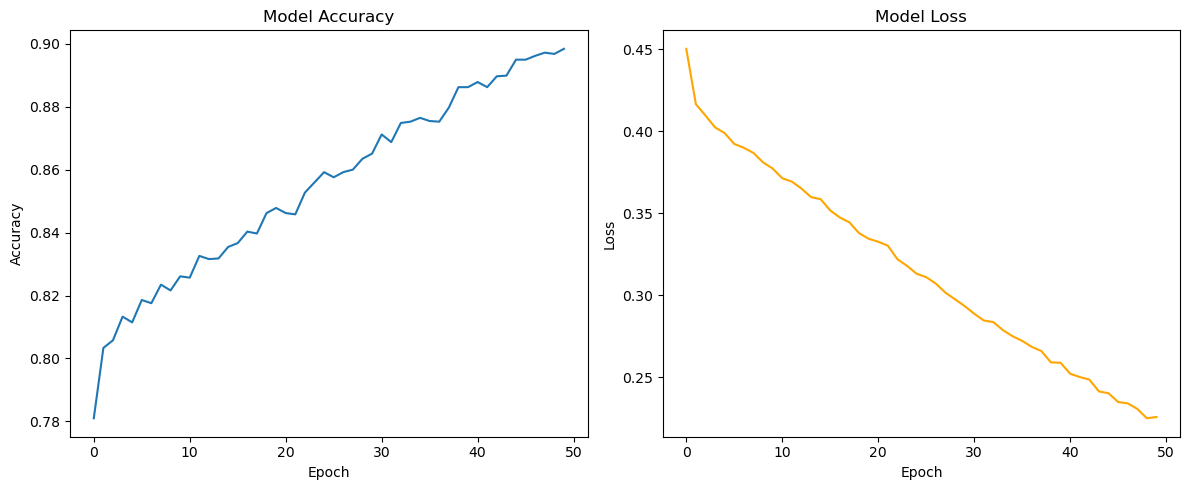

In [16]:
# Plot training accuracy and loss
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], color='orange')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()